# Software profesional en Acústica 2024-25 (M2i)

*This notebook contains a modification of the notebook [FEM_Helmholtz_equation_Robin](https://github.com/spatialaudio/computational_acoustics/blob/master/FEM_Helmholtz_equation_Robin.ipynb), created by Sascha Spors, Frank Schultz, Computational Acoustics Examples, 2018. The text/images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/). The code is released under the [MIT license](https://opensource.org/licenses/MIT).*

# Numerical Solution of the coupling two fluid domains by using an impedance boundary condition associated to a veil or local reacting rigid plate

This notebook illustrates the numerical solution of the wave equation for an harmonic excitation coupling a fluid domain with porous materials using the [Finite Element Method](https://en.wikipedia.org/wiki/Finite_element_method) (FEM). The method aims at an approximate solution by subdividing the area of interest into smaller parts with simpler geometry, linking these parts together and applying methods from the calculus of variations to solve the problem numerically. The FEM is a well established method for the numerical approximation of the solution of partial differential equations (PDEs). The solutions of PDEs are often known analytically only for rather simple geometries. FEM based simulations allow to gain insights into other more complex cases such this coupled fluid-porous problem.

## Problem Statement

The inhomogeneous vector-valued Helmholtz equation governs the displacement field in the fluid domain $\Omega_{\mathrm{F}}$ and it is given as

\begin{equation}
\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}\nabla\text{div}\, U(\mathbf{x}, \omega) + \omega^2\rho_{\mathrm{F}} U(\mathbf{x}, \omega) = - Q(\mathbf{x}, \omega) \qquad\text{in }\Omega_{\mathrm{F}}.
\end{equation}

The fluid domain is split in two parts separated by a impedance boundary condition located on the coupling interface $\Gamma_{\mathrm{I}}$. These coupling conditions between the porous and fluid domains is expressed in terms of the kinetic and kinematic boundary conditions,the continuity of the normal displacements on the coupling boundary and a jump condition on the pressure values, this is,

\begin{equation}
P(\mathbf{x}^{+}, \omega)-P(\mathbf{x}^{-}, \omega) = -i\omega Z_{\mathrm{S}}(\omega)\mathbf{U}(\mathbf{x}, \omega)\cdot\mathbf{n},\qquad \mathbf{x}\in\Gamma_{\mathrm{I}}.
\end{equation}

where $Z_{\mathrm{S}}(\omega)$ is the complex-valued surface impedance associated with the porous veil or the local-reacting rigid plate. In the case of the porous veil $Z_{\mathrm{S}}(\omega) = \alpha+i\beta/\omega$, where $\alpha$ and $\beta$ are constants. For the local-reacting rigid plate, $Z_{\mathrm{S}}(\omega) = (-\omega^2 m -i\omega r +s)/(-i\omega)$, where $m$, $r$, and $s$ are respectively the surface mass density, the damping and the stiffness associated with the rigid plate. The boundary conditions are completed assuming rigid boundaries on the rest of the boundary of the computational domain.

## Variational Formulation

Starting from the variational formulation of the Helmholtz equation (before application of Green's first theorem)

\begin{multline*}
\int_{\Omega_{\mathrm{F}}} \rho_{\mathrm{F}}c_{\mathrm{F}}^{2}\text{div}\, U(\mathbf{x}, \omega)\text{div}\, V(\mathbf{x}, \omega) \mathrm{d}x  - \omega^2\rho_{\mathrm{F}}\int_{\Omega_{\mathrm{F}}} U(\mathbf{x}, \omega)\cdot V(\mathbf{x}, \omega) \mathrm{d}x - i\omega Z_{\mathrm{S}}(\omega)\int_{\Gamma_{\mathrm{I}}} U(\mathbf{x}, \omega)\cdot\mathbf{n} V(\mathbf{x}, \omega)\cdot\mathbf{n} \mathrm{d}x
= -\int_{\Omega_{\mathrm{F}}} Q(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x
\end{multline*}


It is common to express this integral equation in terms of the bilinear $a(P, V)$ and linear $L(V)$ forms 

\begin{equation}
a(U, V) = \int_{\Omega_{\mathrm{F}}} \rho_{\mathrm{F}}c_{\mathrm{F}}^{2}\text{div}\, U(\mathbf{x}, \omega)\text{div}\, V(\mathbf{x}, \omega) \mathrm{d}x  - \omega^2\rho_{\mathrm{F}}\int_{\Omega_{\mathrm{F}}} U(\mathbf{x}, \omega)\cdot V(\mathbf{x}, \omega) \mathrm{d}x - i\omega Z_{\mathrm{S}}(\omega)\int_{\Gamma_{\mathrm{I}}} U(\mathbf{x}, \omega)\cdot\mathbf{n} V(\mathbf{x}, \omega)\cdot\mathbf{n} \mathrm{d}x
\end{equation}

\begin{equation}
L(V) = -\int_{\Omega_{\mathrm{F}}} Q(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x,
\end{equation}

where the variational problem to solve is stated as: Find $U$ such that

\begin{equation}
a(U, V) = L(V)\qquad \forall V.
\end{equation}

Computational implementations of the FEM (like FEniCS) may not be able to handle complex numbers.
In this case the problem can be split into two coupled problems with respect to the real and imaginary part. By introducing $U(\mathbf{x}, \omega) = U_r(\mathbf{x}, \omega) + \mathrm{j} U_i(\mathbf{x}, \omega)$ and $V(\mathbf{x}, \omega) = V_r(\mathbf{x}, \omega) + \mathrm{j} V_i(\mathbf{x}, \omega)$ and identifying the real and imaginary parts of the bilinear and linear forms, we get

\begin{multline*}
a_r = \int_{\Omega_{\mathrm{F}}} \left(\omega^2\rho_{\mathrm{F}} V_r(\mathbf{x}, \omega)\cdot U_r(\mathbf{x}, \omega) -  \omega^2\rho_{\mathrm{F}} V_i(\mathbf{x}, \omega)\cdot U_i(\mathbf{x}, \omega) - \rho_{\mathrm{F}}c_{\mathrm{F}}^{2}\text{div}\, U_r(\mathbf{x}, \omega) \text{div}\, V_r(\mathbf{x}, \omega) + \rho_{\mathrm{F}}c_{\mathrm{F}}^{2}\text{div}\, U_i(\mathbf{x}, \omega) \text{div}\, V_i(\mathbf{x}, \omega) \right) \mathrm{d}x\\
-i\omega Z_{\mathrm{S}}(\omega)\int_{\Gamma_{\mathrm{I}}} \left( V_i(\mathbf{x}, \omega)\cdot\mathbf{n} U_r(\mathbf{x}, \omega)\cdot\mathbf{n} + V_r(\mathbf{x}, \omega)\cdot\mathbf{n} U_i(\mathbf{x}, \omega)\cdot\mathbf{n} \right) \mathrm{d}x, 
\end{multline*}

\begin{multline*}
a_i = \int_{\Omega_{\mathrm{F}}} \left(\omega^2\rho_{\mathrm{F}} V_r(\mathbf{x}, \omega)\cdot U_i(\mathbf{x}, \omega) +  \omega^2\rho_{\mathrm{F}} V_i(\mathbf{x}, \omega)\cdot U_r(\mathbf{x}, \omega) - \rho_{\mathrm{F}}c_{\mathrm{F}}^{2}\text{div}\,U_i(\mathbf{x}, \omega) \text{div}\, V_r(\mathbf{x}, \omega) + \rho_{\mathrm{F}}c_{\mathrm{F}}^{2}\text{div}\,U_r(\mathbf{x}, \omega) \text{div}\, V_i(\mathbf{x}, \omega) \right) \mathrm{d}x\\ 
+i\omega Z_{\mathrm{S}}(\omega)\int_{\Gamma_{\mathrm{I}}} \left( V_r(\mathbf{x}, \omega)\cdot\mathbf{n} U_r(\mathbf{x}, \omega)\cdot\mathbf{n} - V_i(\mathbf{x}, \omega)\cdot\mathbf{n} U_i(\mathbf{x}, \omega)\cdot\mathbf{n} \right) \mathrm{d}s
\end{multline*}

for the bilinear form.

## Numerical Solution

The numerical solution of the variational problem is based on [FEniCS](https://fenicsproject.org/), an open-source framework for numerical solution of PDEs.
Its high-level Python interface `dolfin` is used in the following to define the problem and compute the solution.
The implementation is based on the variational formulation derived above.
It is common in the FEM to denote the solution of the problem by $u$ and the test function by $v$.
The definition of the problem in FEniCS is very close to the mathematical formulation of the problem.

For the subsequent examples the solution of inhomogeneous wave equation for a point source $Q(\mathbf{x}) = \delta(\mathbf{x}-\mathbf{x_s})$ at position $\mathbf{x_s}$ is computed using the FEM.
A function is defined for this purpose, as well as for the plotting of the resulting sound field.

In [1]:
import dolfin
import mshr
import numpy as np
import matplotlib.pyplot as plt

def fluid_impedance(mesh, frequency, xs, alpha=0., beta=0.):
    
    # Define subdomain markers and integration measure
    dx = dolfin.Measure('dx', domain=mesh)

    # physical parameters
    omega = 2*dolfin.pi*frequency
    rhoF = 1.21 # mass density in the fluid
    bulkF = rhoF*343**2 # bulk modulus in the fluid
    Zs = alpha + 1j*beta/omega # surface impedance
    
    # Initialize subdomain and boundary markers
    tol = 1e-5
    coupling_boundary = dolfin.CompiledSubDomain('near(x[0],L,tol)', L=3.25, tol=tol)
    
    # Initialize mesh function for boundary
    boundary_markers = dolfin.MeshFunction('size_t', mesh, mesh.topology().dim() - 1)
    boundary_markers.set_all(0)
    coupling_boundary.mark(boundary_markers, 1)

    # Define the boundary measure with the boundary markers
    dx = dolfin.Measure('dx', domain=mesh)

    # Define the boundary measure with the boundary markers in the interior of the domain
    dS = dolfin.Measure('dS', domain=mesh, subdomain_data=boundary_markers)
                
    # Define function space (Lagrange 1st polynomials)
    RT = dolfin.FiniteElement("RT", mesh.ufl_cell(), 1)
    V = dolfin.FunctionSpace(mesh, dolfin.MixedElement([RT, RT]))

    # define variational problem
    (u_r, u_i) = dolfin.TrialFunctions(V)
    (v_r, v_i) = dolfin.TestFunctions(V)

    # Variational terms
    n = dolfin.FacetNormal(mesh)
    a_r = (omega**2*rhoF * dolfin.inner(u_r,v_r) - omega**2*rhoF * dolfin.inner(u_i,v_i) - bulkF * dolfin.inner(dolfin.div(u_r), dolfin.div(v_r)) + bulkF * dolfin.inner(dolfin.div(u_i), dolfin.div(v_i)) )*dx 
    a_r_Zs = (omega*Zs.imag*dolfin.inner(u_r('+'),n('+'))*dolfin.inner(v_i('+'),n('+')) + omega*Zs.imag*dolfin.inner(u_i('+'),n('+'))*dolfin.inner(v_r('+'),n('+')) ) * dS(1)
    a_i = (omega**2*rhoF * dolfin.inner(u_r,v_i) + omega**2*rhoF * dolfin.inner(u_i,v_r) - bulkF * dolfin.inner(dolfin.div(u_r), dolfin.div(v_i)) - bulkF * dolfin.inner(dolfin.div(u_i), dolfin.div(v_r)) )*dx 
    a_i_Zs = (omega*Zs.real*dolfin.inner(u_r('+'),n('+'))*dolfin.inner(v_r('+'),n('+')) - omega*Zs.real*dolfin.inner(u_i('+'),n('+'))*dolfin.inner(v_i('+'),n('+')) ) * dS(1)
    
    # Null volumetric source term
    L_r = dolfin.inner(dolfin.Constant((0,0)), v_r) * dolfin.dx
    L_i = dolfin.inner(dolfin.Constant((0,0)), v_i) * dolfin.dx

    # define boundary conditions
    bcs = [dolfin.DirichletBC(V.sub(0), dolfin.Constant((0, 0)), "on_boundary"), dolfin.DirichletBC(V.sub(1), dolfin.Constant((0, 0)), "on_boundary")]
    
    # Complete variational formulation and assembly
    a = a_r + a_i + a_r_Zs + a_i_Zs
    L = L_r + L_i
    A, b = dolfin.assemble_system(a, L, bcs)

    # define inhomogenity
    delta = dolfin.PointSource(V.sub(0), xs, -1)  # negative amplitude accounts for -Q(x,w) in inhomogeneous wave equation
    delta.apply(b)

    # compute solution
    sol = dolfin.Function(V)
    dolfin.solve(A, sol.vector(), b)
    (sol_re, sol_im) = sol.split(True)
    sol_re.rename("Re(u)", "Real FE approx.")
    sol_im.rename("Im(u)", "Imag. FE approx.")
    
    return sol_re, sol_im


def plot_soundfield(u):
    '''plots solution of FEM-based simulation'''
    fig = plt.figure(figsize=(10,10))
    fig = dolfin.plot(u)
    plt.title(r'$P(\mathbf{x}, \omega)$')
    plt.xlabel(r'$x$ in m')
    plt.ylabel(r'$y$ in m')
    plt.colorbar(fig, fraction=0.038, pad=0.04);

### Sound Field transmitted through a layer of porous material

Two 2D-dimensional rooms are connected by a layer of porous material. The porous layer decrease the amplitude of the pressure field and the sound power level is computed on both rooms to check the efficiency absorbing the incident pressure generated by a point source in the left room

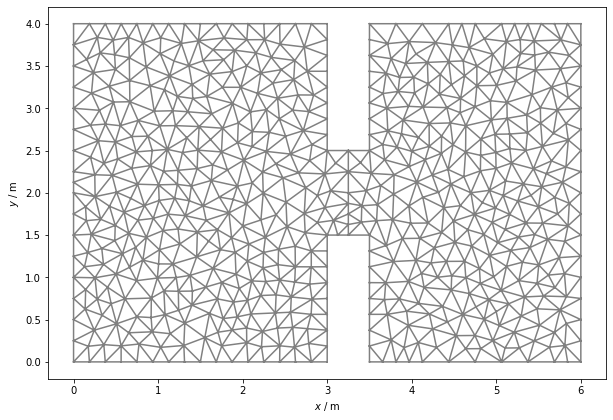

In [2]:
# define geometry and mesh
domain_fluid_input = mshr.Rectangle(dolfin.Point(0, 0), dolfin.Point(3,4)) + mshr.Rectangle(dolfin.Point(3, 1.5), dolfin.Point(3.25, 2.5))
domain_fluid_output = mshr.Rectangle(dolfin.Point(3.5, 0), dolfin.Point(6, 4)) + mshr.Rectangle(dolfin.Point(3.25, 1.5), dolfin.Point(3.5, 2.5)) 
domain = domain_fluid_input + domain_fluid_output

# Marking the subdomains of the fluid
domain.set_subdomain(1, domain_fluid_input)
domain.set_subdomain(2, domain_fluid_output)

# Build the mesh
mesh = mshr.generate_mesh(domain, 20)

# Plot the mesh
fig = plt.figure(figsize=(10,10))
fig = dolfin.plot(mesh)
plt.xlabel(r'$x$ / m')
plt.ylabel(r'$y$ / m');

The two-dimensional sound field in a rectangular room (rectangular plate) with homogeneous Robin boundary conditions is computed for the frequency $f=120$ Hz and source position $x_s = (1.2,3.2)$ m.

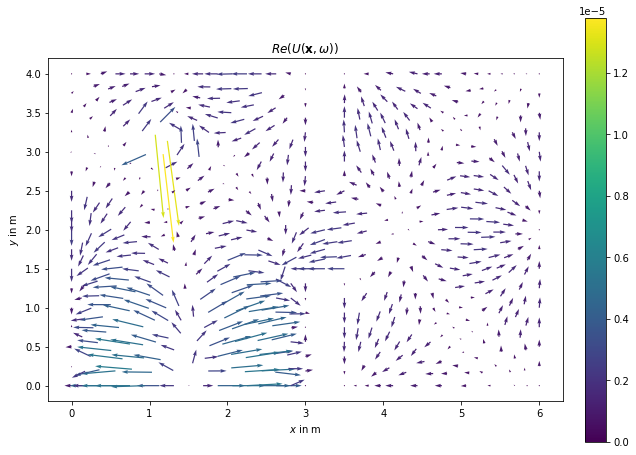

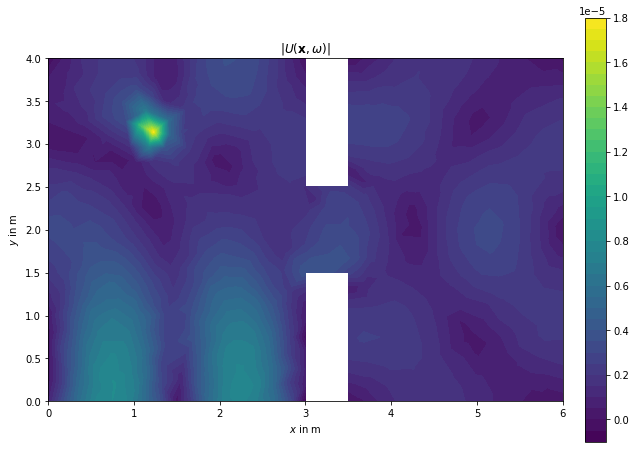

In [3]:
f = 120.0  # frequency
xs = dolfin.Point(1.2, 3.2)  # source position

# compute solution for sigma=0: no porous material in the brick
sol_re, sol_im = fluid_impedance(mesh, f, xs, alpha=0., beta=0.)

# plot displacement field: real part
plot_soundfield(sol_re)
plt.title(r'$Re(U(\mathbf{x}, \omega))$')

# plot displacement field: magnitude
plot_soundfield(dolfin.sqrt(sol_re[0]**2+sol_re[1]**2+sol_im[0]**2+sol_im[1]**2))
plt.title(r'$|U(\mathbf{x}, \omega)|$');

Compute the sound velocity level (SVL) in the output and input room

In [4]:
markers = dolfin.MeshFunction('size_t', mesh, 2, mesh.domains())
dx = dolfin.Measure('dx', domain=mesh, subdomain_data=markers)
v_ref = 5e-8 # Reference velocity
omega = 2.0*np.pi*f # angular frequency
SVL_input = 20*np.log10(omega*dolfin.assemble(dolfin.sqrt(sol_re[0]**2+sol_re[1]**2+sol_im[0]**2+sol_im[1]**2)*dx(1))/v_ref)
SVL_output = 20*np.log10(omega*dolfin.assemble(dolfin.sqrt(sol_re[0]**2+sol_re[1]**2+sol_im[0]**2+sol_im[1]**2)*dx(2))/v_ref)
print('SVL in the input room without surface impedance:', SVL_input,'dB')
print('SVL in the output room without surface impedance:', SVL_output,'dB')

SVL in the input room without surface impedance: 115.00180004239323 dB
SVL in the output room without surface impedance: 108.4843607264935 dB


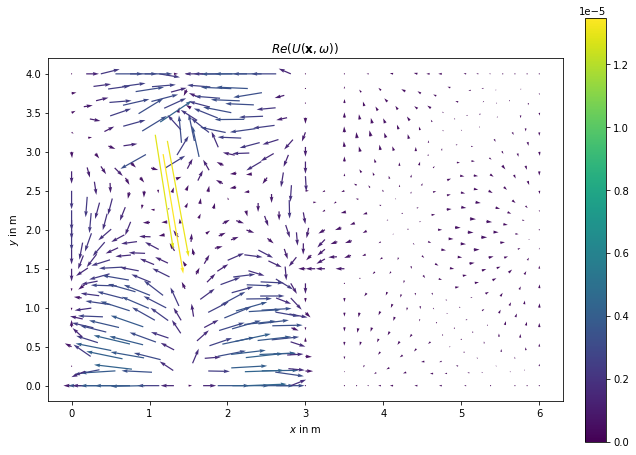

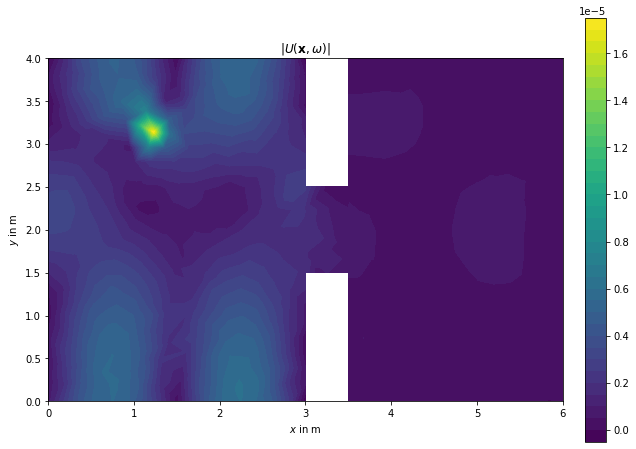

In [5]:
f = 120.0  # frequency
xs = dolfin.Point(1.2, 3.2)  # source position

# compute solution for sigma=0: no porous material in the brick
sol_re, sol_im = fluid_impedance(mesh, f, xs, alpha=1e3, beta=5e2)

# plot displacement field: real part
plot_soundfield(sol_re)
plt.title(r'$Re(U(\mathbf{x}, \omega))$')

# plot displacement field: magnitude
plot_soundfield(dolfin.sqrt(sol_re[0]**2+sol_re[1]**2+sol_im[0]**2+sol_im[1]**2))
plt.title(r'$|U(\mathbf{x}, \omega)|$');

Compute the SVL values associated with the input and output room, and the insertion loss (IL) values 

In [6]:
markers = dolfin.MeshFunction('size_t', mesh, 2, mesh.domains())
dx = dolfin.Measure('dx', domain=mesh, subdomain_data=markers)
v_ref = 5e-8 # Reference velocity
SVL_input_impedance = 10*np.log10(omega*dolfin.assemble(dolfin.sqrt(sol_re[0]**2+sol_re[1]**2+sol_im[0]**2+sol_im[1]**2)*dx(1))/v_ref)
SVL_output_impedance = 10*np.log10(omega*dolfin.assemble(dolfin.sqrt(sol_re[0]**2+sol_re[1]**2+sol_im[0]**2+sol_im[1]**2)*dx(2))/v_ref)
print('SVL in the input room with surface impedance:', SVL_input_impedance,'dB')
print('SVL in the output room with surface impedance:', SVL_output_impedance,'dB')

# Insertion loss for the particle velocity
IL = SVL_output - SVL_output_impedance
print('Insersion loss (IL):', IL,'dB')

SVL in the input room with surface impedance: 57.16665776340665 dB
SVL in the output room with surface impedance: 47.64993024955671 dB
Insersion loss (IL): 60.834430476936795 dB


**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).